<a href="https://colab.research.google.com/github/yev34/Machine-learning/blob/main/%D0%9F%D0%B0%D1%82%D0%B0%D0%BB%D0%B0%D1%88%D0%BA%D0%BE_%D0%BB%D0%B0%D0%B15_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

Завантажити датасет Ірис

In [2]:
iris = load_iris()
x = iris.data

Роздрукувати перші 5 рядочків.

In [3]:
pd.DataFrame(x, columns=iris.feature_names).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Масштабування даних

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(load_iris().data)

X_2d = pd.DataFrame(X_scaled, columns=load_iris().feature_names).iloc[:, 1:]

wcss_2d = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_2d)
    wcss_2d.append(kmeans.inertia_)

Візуалізація

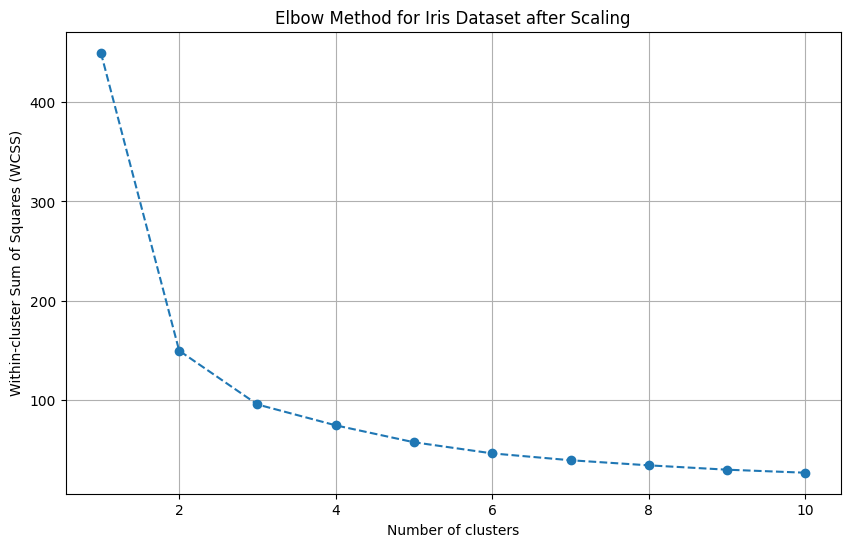

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss_2d, marker='o', linestyle='--')
plt.title('Elbow Method for Iris Dataset after Scaling')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

Методом ліктя і методом силуєтів визначити оптимальну кількість кластерів.

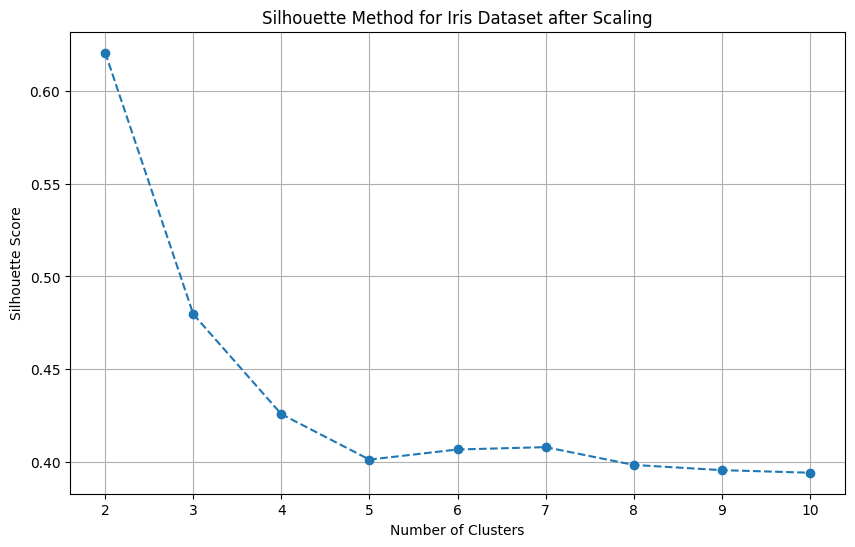

In [6]:
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(X_2d)
    silhouette_avg = silhouette_score(X_2d, cluster_labels)
    silhouette_scores.append(silhouette_avg)


plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Method for Iris Dataset after Scaling')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


Візуалізувати кластери.

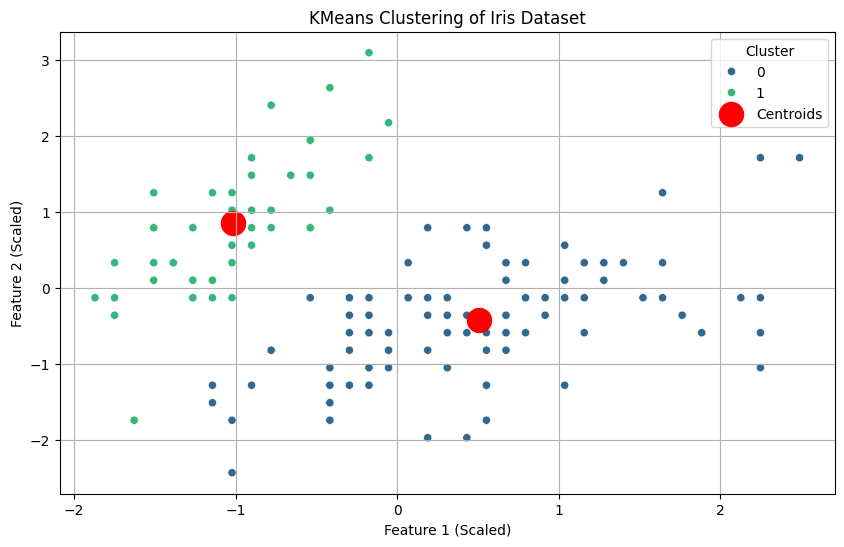

In [7]:

import seaborn as sns


kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=clusters, palette='viridis', legend='full')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('KMeans Clustering of Iris Dataset')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


Висновок: метод ліктя вказує на точку "зламу" на графіку WCSS (сум квадратів відстаней до центрів кластерів), що відображає оптимальну кількість кластерів. Метод силуетів визначає оптимальну кількість кластерів за максимальним середнім значенням коефіцієнта силуету. Обидва методи дали однаковий результат.